In [66]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [67]:
df=pd.read_csv('/Users/vins/Desktop/Datasets/Logistic_Regression/Social_Network_Ads.csv')

In [68]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [69]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values


In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,shuffle=True,random_state=0)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc_x=StandardScaler()

In [73]:
X_train = sc_x.fit_transform(X_train)

C:\Users\vins\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [74]:
X_test=sc_x.transform(X_test)

C:\Users\vins\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
# confusion_matrix(y_test,y_pred)

In [77]:
from sklearn.svm import SVC

In [78]:
sup_vec_mac=SVC(kernel='rbf') #we can change the kernal like === rbf,poly,sigmoid,linear

In [79]:
sup_vec_mac.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
y_preic=sup_vec_mac.predict(X_test)

In [81]:
confusion_matrix(y_test,y_preic)

array([[64,  4],
       [ 3, 29]], dtype=int64)

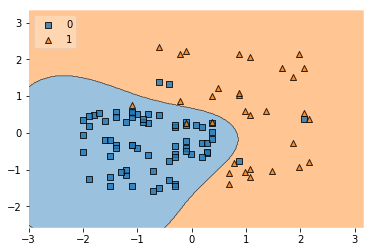

In [82]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test,y_test,clf=sup_vec_mac,legend=2)

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
acc=cross_val_score(estimator=sup_vec_mac,X=X_train,y=y_train,cv=10)

In [85]:
acc.mean()

0.9005302187615868

In [86]:
acc.std()

0.06388957356626285

In [87]:
from sklearn.model_selection import GridSearchCV

In [98]:
param=[{'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

In [99]:
grid_search=GridSearchCV(estimator=sup_vec_mac,param_grid=param,scoring='accuracy',cv=10,n_jobs=1)

In [100]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [101]:
grid_search.best_score_

0.9033333333333333

In [102]:
grid_search.best_params_

{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}

In [107]:
y_predict=grid_search.predict(X_test)

In [108]:
confusion_matrix(y_test,y_predict)

array([[64,  4],
       [ 3, 29]], dtype=int64)

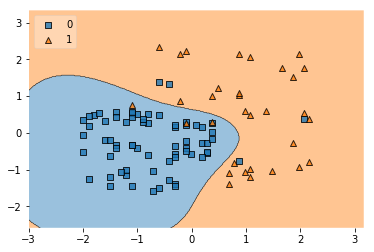

In [109]:
plot_decision_regions(X_test,y_test,clf=grid_search,legend=2)